Steps in modelling for binary and multiclass classification:
* Creating a model
* Compiling a model
  * Defining a loss function
  * Setting up an optimizer
      * Finding the best learning rate
  * Creating evaluation metrics
* Fitting a model(getting it to find patterns in our data)
* Improving a model
  
- The power of non-linearity
- Evaluating classification models
  * Visualizing the model
  * Looking at training curves
  * Compare predictions to ground truth(using our evaluation metrics)

### Typical architecture of a classification neura network

Some fundamentals all deep neural networks contain:
* An input layer
* Some hidden layer
* An output layer


* Input layer shape-Same as number of features
* Hidden layer(s) - Problem specific, minimum = 1, maximum = unlimited
* Neurons per hidden layer - Problem specific, generally 10 to 100
* Output layer shape - 1(one class or the other)
* Hidden activation - Usually ReLU(rectified linear unit)
* Output activation - Sigmoid
* Loss function - Cross Entropy(`tf.keras.losses.BinaryCrossentropy`)
* Optimizer-SGD, Adam

In [17]:
import tensorflow as tf

In [18]:
from sklearn.datasets import make_circles
n_samples=1000

In [19]:
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [20]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

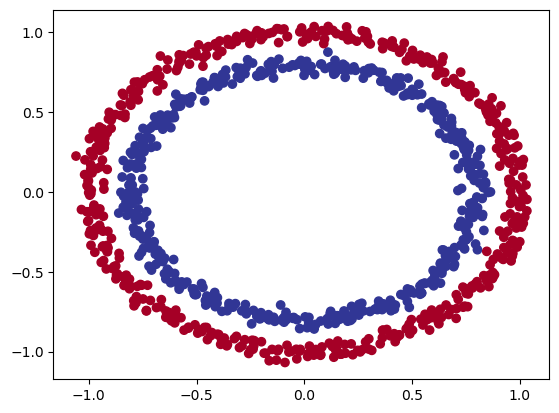

In [8]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### Input and Output Shapes

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
len(X),len(y)

(1000, 1000)

In [11]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

Our neural network input shape will have to accept a tensor with at least one dimension being two and output a tensor with at least one value.

### Steps in modelling

1. Creating a model-piece together the layers of a neural network(using the functional or sequential API) or import a previously build model(known as transfer learning).
2. Compiling a model-defining how a model's performance should be measured(loss/metrics)as well as defining how it should improve(optimizer).
3. Fitting a model-letting the model try to find patterns in the data.

In [13]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 4.7010 - accuracy: 0.4750
Epoch 2/5
32/32 [==============================] - 0s 871us/step - loss: 3.8273 - accuracy: 0.4760
Epoch 3/5
32/32 [==============================] - 0s 857us/step - loss: 1.3254 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 859us/step - loss: 0.7261 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 921us/step - loss: 0.7035 - accuracy: 0.4990


In [14]:
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 874us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

We have trained enough, let's try adding more layers.

In [16]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
model_2.fit(X,y,epochs=100,verbose=0)

In [17]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 794us/step - loss: 0.6934 - accuracy: 0.5000


[0.6933673024177551, 0.5]

### Improving a model
1. Creating a model - add more layers, increase the number of hidden units(also called neurons) within each layer, change the activation functions of each layer.
2. Compiling a model - choose a different optimization function(such as the Adam optimizer) or perhaps change the learning rate of the optimization function.
3. Fitting a model - fit a model for more epochs.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # can also do activation='relu'neurons
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=40, verbose=1) # fit for 100 passes of the data

Epoch 1/40
32/32 [==============================] - 0s 1ms/step - loss: 1.1827 - accuracy: 0.4640
Epoch 2/40
32/32 [==============================] - 0s 1ms/step - loss: 0.8786 - accuracy: 0.3900
Epoch 3/40
32/32 [==============================] - 0s 973us/step - loss: 0.8377 - accuracy: 0.3840
Epoch 4/40
32/32 [==============================] - 0s 912us/step - loss: 0.8162 - accuracy: 0.3920
Epoch 5/40
32/32 [==============================] - 0s 1ms/step - loss: 0.7989 - accuracy: 0.3980
Epoch 6/40
32/32 [==============================] - 0s 1ms/step - loss: 0.7852 - accuracy: 0.3850
Epoch 7/40
32/32 [==============================] - 0s 1ms/step - loss: 0.7740 - accuracy: 0.3810
Epoch 8/40
32/32 [==============================] - 0s 1ms/step - loss: 0.7661 - accuracy: 0.3670
Epoch 9/40
32/32 [==============================] - 0s 1ms/step - loss: 0.7595 - accuracy: 0.3720
Epoch 10/40
32/32 [==============================] - 0s 1ms/step - loss: 0.7535 - accuracy: 0.3920
Epoch 11/40
32/

Inspect data, inspect model, inspect model's predictions.

In [27]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.5)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


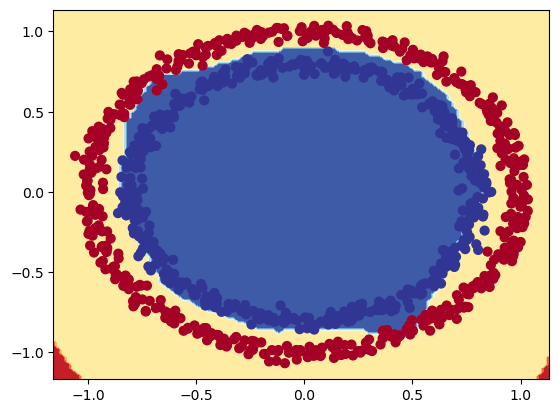

In [54]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [55]:
model_3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 10)                30        
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Non-straight(non-linear) line patterns

To Model classification data, we need some non-linear lines

The main change we'll add to models we've built before is the use of the `activation` keyword.

In [57]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
    tf.keras.layers.Dense(1)
])
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     metrics=['accuracy'])
history=model_4.fit(X,y,epochs=100,verbose=0)

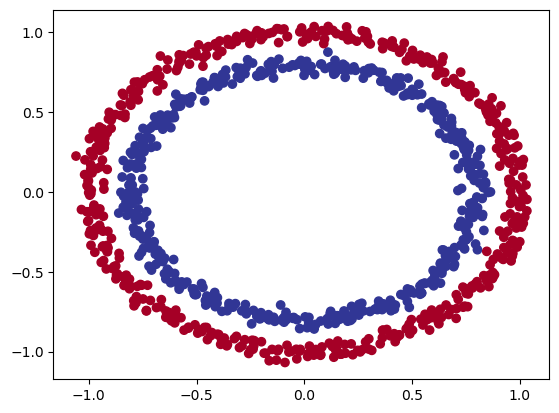

In [58]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


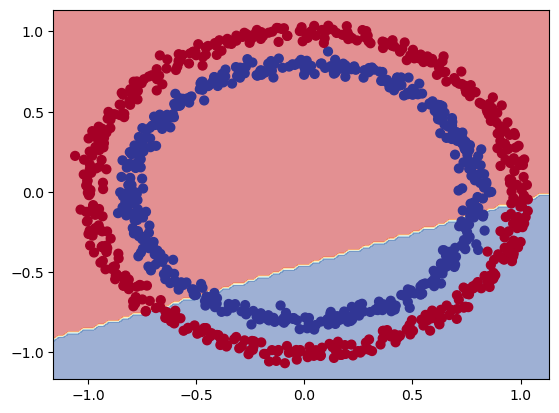

In [61]:
plot_decision_boundary(model_4, X, y)

In [62]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


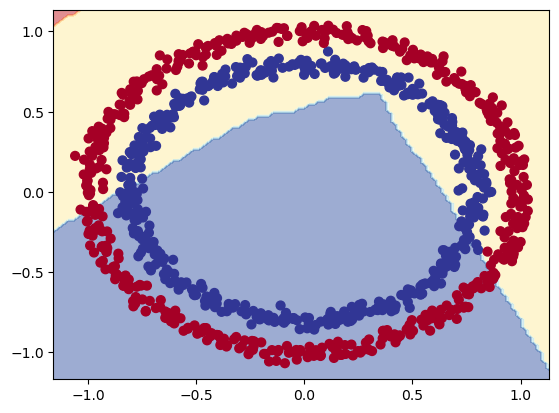

In [63]:
plot_decision_boundary(model_6, X, y)

In [66]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=150, verbose=0)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


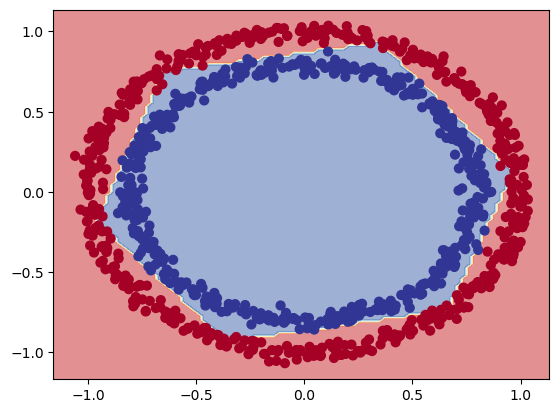

In [67]:
plot_decision_boundary(model_7, X, y)

The combination of linear(straight lines) and non-linear(non-straight lines) functions is one of the key fundamentals of neural networks.

### Making the activation functions from scratch

In [4]:
import tensorflow as tf
import  matplotlib.pyplot as plt
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

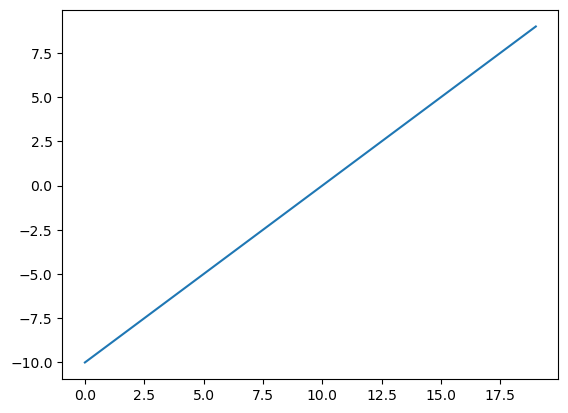

In [5]:
plt.plot(A)

In [7]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

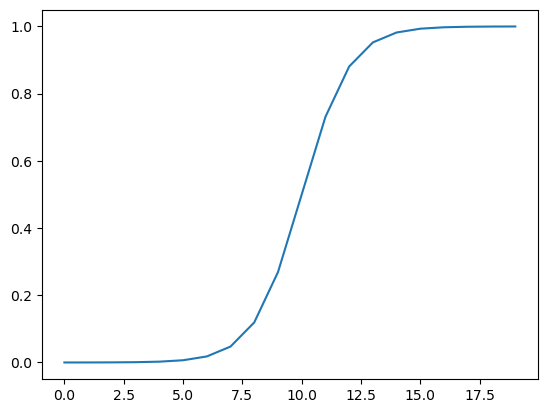

In [8]:
plt.plot(sigmoid(A))

In [9]:
def relu(x):
    return tf.maximum(0,x)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

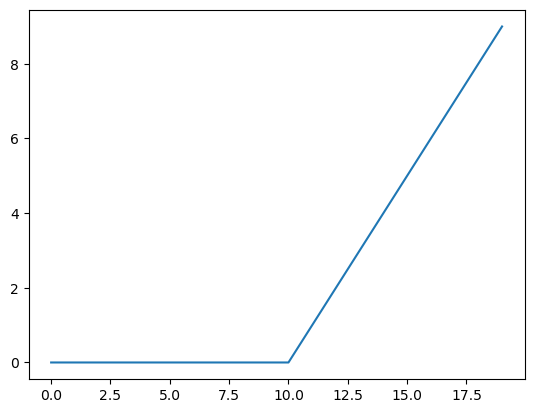

In [11]:
plt.plot(relu(A))

In [12]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [13]:
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Where as, with our non-linear functions, our data gets manipulated. A neural network uses these kind of transformations at a large scale to figure draw patterns between its input and outputs.

> 📖  **Resource:** For more on activation functions, check out the [machine learning cheatsheet page](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#) 

### Evaluating and improving our classification model

We have been evaluating our model on the same data it was trained on. A better approach would be to split our data into training, validation(optional) and test sets.


In [21]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [29]:
tf.random.set_seed(42)

model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])
history=model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5150
Epoch 2/25
25/25 [==============================] - 0s 1000us/step - loss: 0.6845 - accuracy: 0.5713
Epoch 3/25
25/25 [==============================] - 0s 914us/step - loss: 0.6771 - accuracy: 0.5900
Epoch 4/25
25/25 [==============================] - 0s 829us/step - loss: 0.6677 - accuracy: 0.6075
Epoch 5/25
25/25 [==============================] - 0s 814us/step - loss: 0.6559 - accuracy: 0.6000
Epoch 6/25
25/25 [==============================] - 0s 901us/step - loss: 0.6394 - accuracy: 0.6550
Epoch 7/25
25/25 [==============================] - 0s 875us/step - loss: 0.6164 - accuracy: 0.7212
Epoch 8/25
25/25 [==============================] - 0s 874us/step - loss: 0.5923 - accuracy: 0.7450
Epoch 9/25
25/25 [==============================] - 0s 867us/step - loss: 0.5590 - accuracy: 0.7837
Epoch 10/25
25/25 [==============================] - 0s 917us/step - loss: 0.5258 - accuracy: 0.8275


In [30]:
loss,accuracy=model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9800


In [31]:
loss, accuracy

(0.11878135055303574, 0.9800000190734863)

* `activation` parameter - `relu`&`sigmoid` instead of using library paths, `tf.keras.activations.relu`, they both offer the same functionality

* `learning_rate`(also `lr`) in the Adam optimizer - how quickly a model learns. The higher the learning rate, the faster the model's capacity to learn, however there's such a thing as a too high learning rate, where a model tries to learn too fast and doesn't learn anything. Find the ideal lerning rate.

* The number of epochs - our model may perform well in even less epcohs(a single epoch means model trying to learn patterns in the data by looking at it once, 25 epochs means model gets 25 chances) because we increased the learning rate

313/313 [==============================] - 0s 622us/step
doing binary classifcation...
313/313 [==============================] - 0s 622us/step
doing binary classifcation...


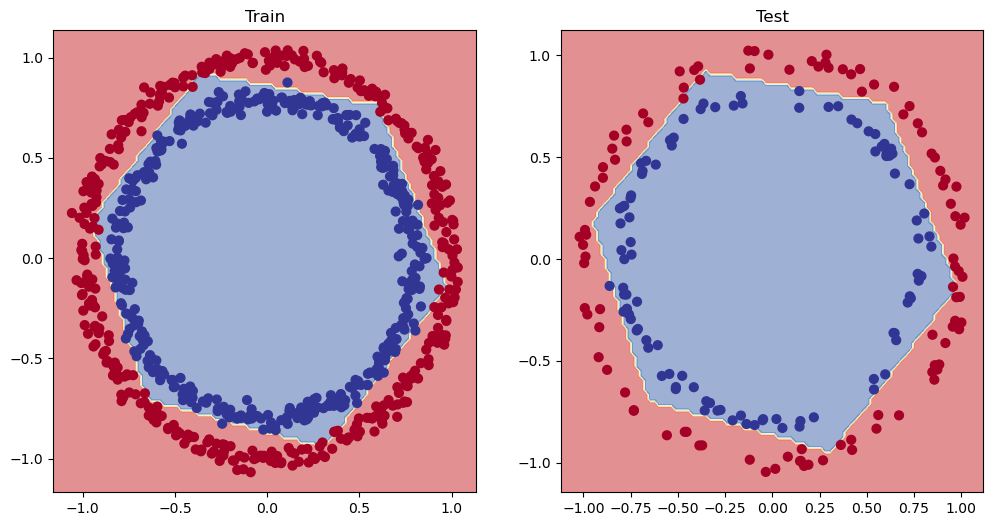

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_8,X=X_test,y=y_test)
plt.show()

### Plot the loss curves

How did the performance change everytijme the model had a chance to look at the data(once every epoch)?
Checking the **loss curves**(also referred to as the **learning curves**).


<Axes: >

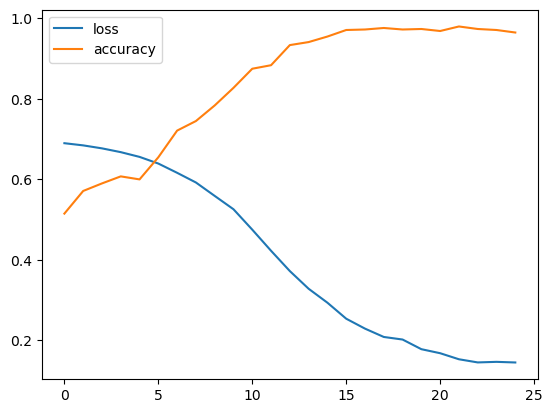

In [33]:
pd.DataFrame(history.history).plot()

Loss curves are working fine...Accuracy goes a bit low but will work fine if trained for longer

In [68]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.697875,0.503
1,0.694508,0.505
2,0.692053,0.521
3,0.690002,0.524
4,0.688383,0.530
...,...,...
145,0.144834,0.984
146,0.143728,0.980
147,0.142213,0.983
148,0.140371,0.982


Text(0.5, 1.0, 'Model 8 training curves')

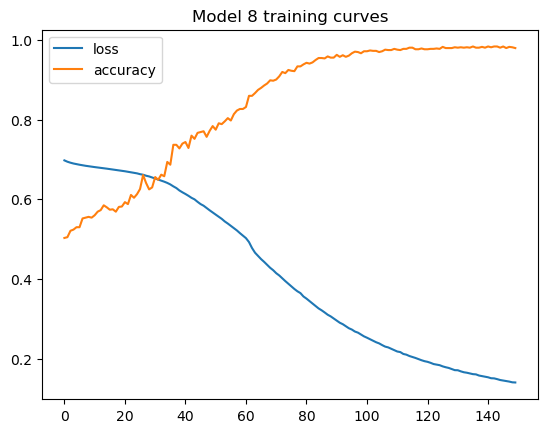

In [70]:
pd.DataFrame(history.history).plot()
plt.title("Model 8 training curves")

### Finding the best learning rate

A trick which will help to find the optimal learning rate(at least to begin training with) for our models going forward.

* A learning rate callback
  * Callback as an extra piece of functionality we can add to our model while its training.
* A modified loss curves plot


- 🔑 Note: The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the Adam optimizer's default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [34]:
tf.random.set_seed(42)

model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# model_9.compile(loss=tf.keras.losses.binary_crossentropy,
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=['accuracy'])
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])
# Create a learning rate scheduler callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20)) # Traverse a set of learning rate values starting from 1e-4, increasing to 10**(epoch/20) every epoch

history=model_9.fit(X,y,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7154 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 0s 976us/step - loss: 0.7144 - accuracy: 0.5010 - lr: 1.1220e-04
Epoch 3/100
32/32 [==============================] - 0s 909us/step - loss: 0.7133 - accuracy: 0.5010 - lr: 1.2589e-04
Epoch 4/100
32/32 [==============================] - 0s 914us/step - loss: 0.7122 - accuracy: 0.4890 - lr: 1.4125e-04
Epoch 5/100
32/32 [==============================] - 0s 903us/step - loss: 0.7110 - accuracy: 0.4900 - lr: 1.5849e-04
Epoch 6/100
32/32 [==============================] - 0s 900us/step - loss: 0.7100 - accuracy: 0.4920 - lr: 1.7783e-04
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7088 - accuracy: 0.4890 - lr: 1.9953e-04
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7076 - accuracy: 0.4940 - lr: 2.2387e-04
Epoch 9/100
32/32 [==============================] - 0s 1ms/st

<Axes: xlabel='Epochs'>

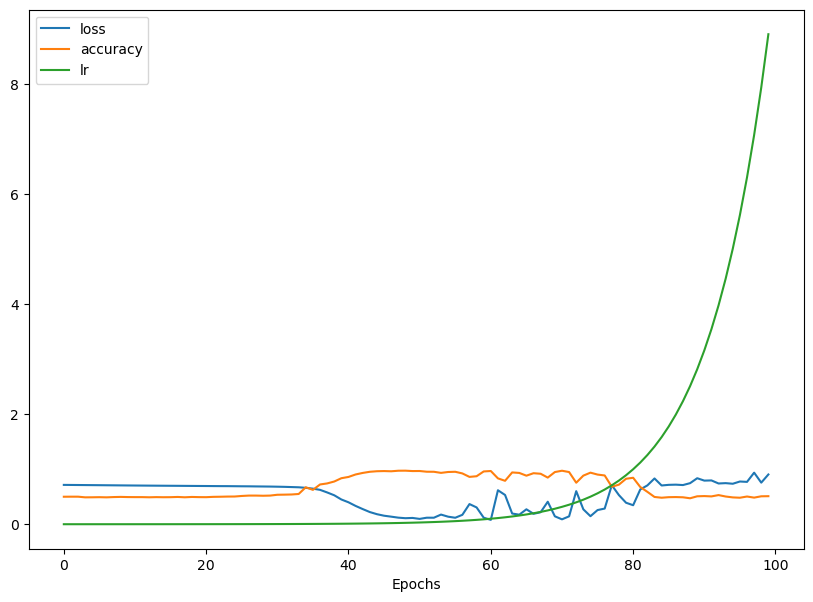

In [35]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="Epochs")

Learning rate exponentially increases as the number of epochs increases.
We can the model's accuracy goes up (and loss goes down) at a specific point where learning rate slowlu increases.
To figure our where this infliction point is, we can plot the loss versus the log-scale learning rate.

In [39]:
lrs=1e-4*(10**(np.arange(100)/20))
lrs

array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.46683592e-02, 5.01187234e-02, 5.62341325e-02,
      

Text(0.5, 1.0, 'Learning Rate vs Loss')

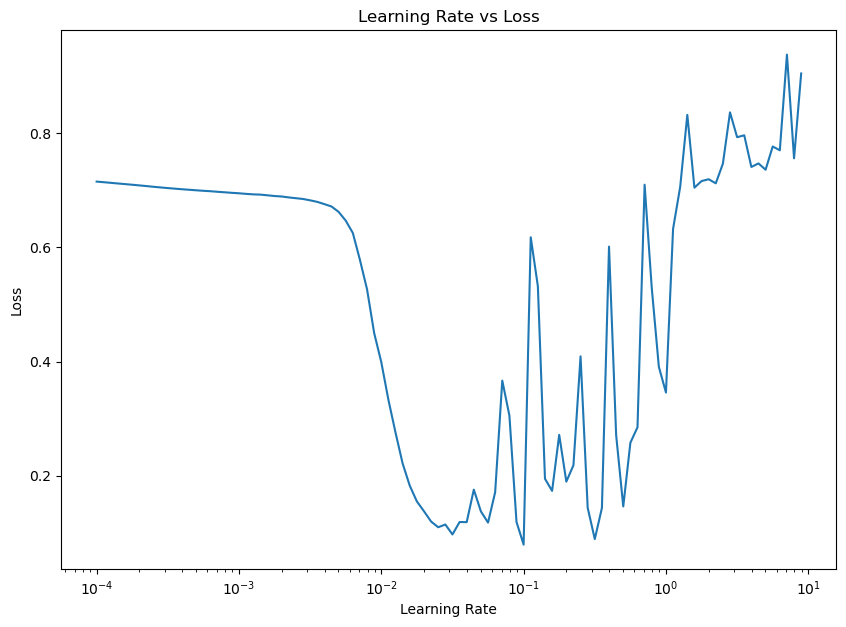

In [40]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

To figure out the ideal value of the learning rate(at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out(usually about 10x smaller than the bottom of the curve).
In this case, out ideal learning rate ends up between `0.01` and `0.02`.

The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out(a value where the loss is still decreasing).

In [43]:
tf.random.set_seed(42)
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])
history=model_10.fit(X_train,y_train,epochs=20,verbose=0)

With a little higher learning rrate(`0.02` instead of `0.01` we reach higher accuracy than `model_8` in less epochs(`20` instead of `25`)).

In [44]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9900


[0.05464722216129303, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


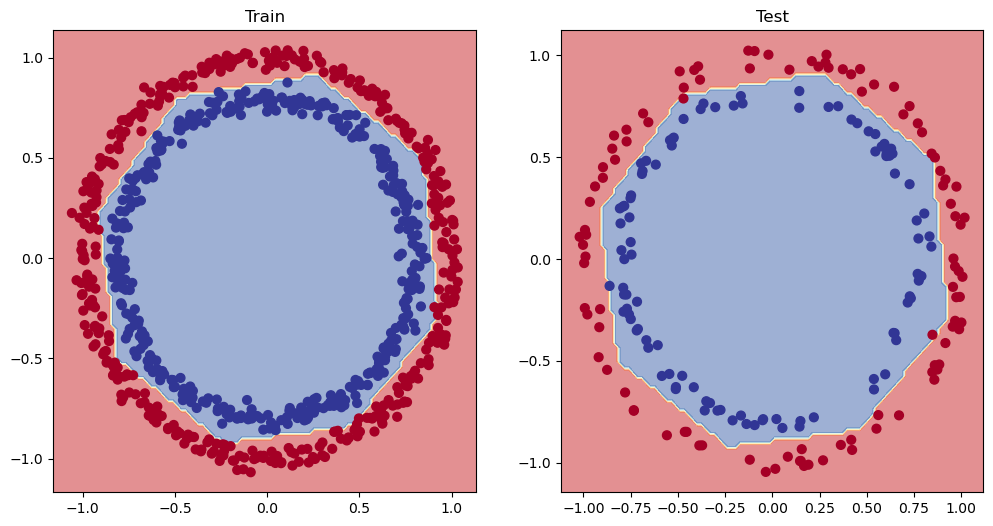

In [46]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show()

### More classification evaluation methods

* Accuracy-Out of 100 preictions, how many does our model get correct? - `sklearn.metrics.accuracy_score()` or `tf.keras.metrics.Accuracy()`
* Precision-Propotion of true positives over total number samples. Higher precision leads to less false positive(model predicts 1 when it should have been 0) - `sklearn.metrics.precision_score()` or `tf.keras.metrics.Precision()`
* Recall-Proportion of true positives over total number of true positives and false negatives()
* F1-score
* Confusion Matrix
* Classification report

### Multiclass Classification

In [71]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step
